
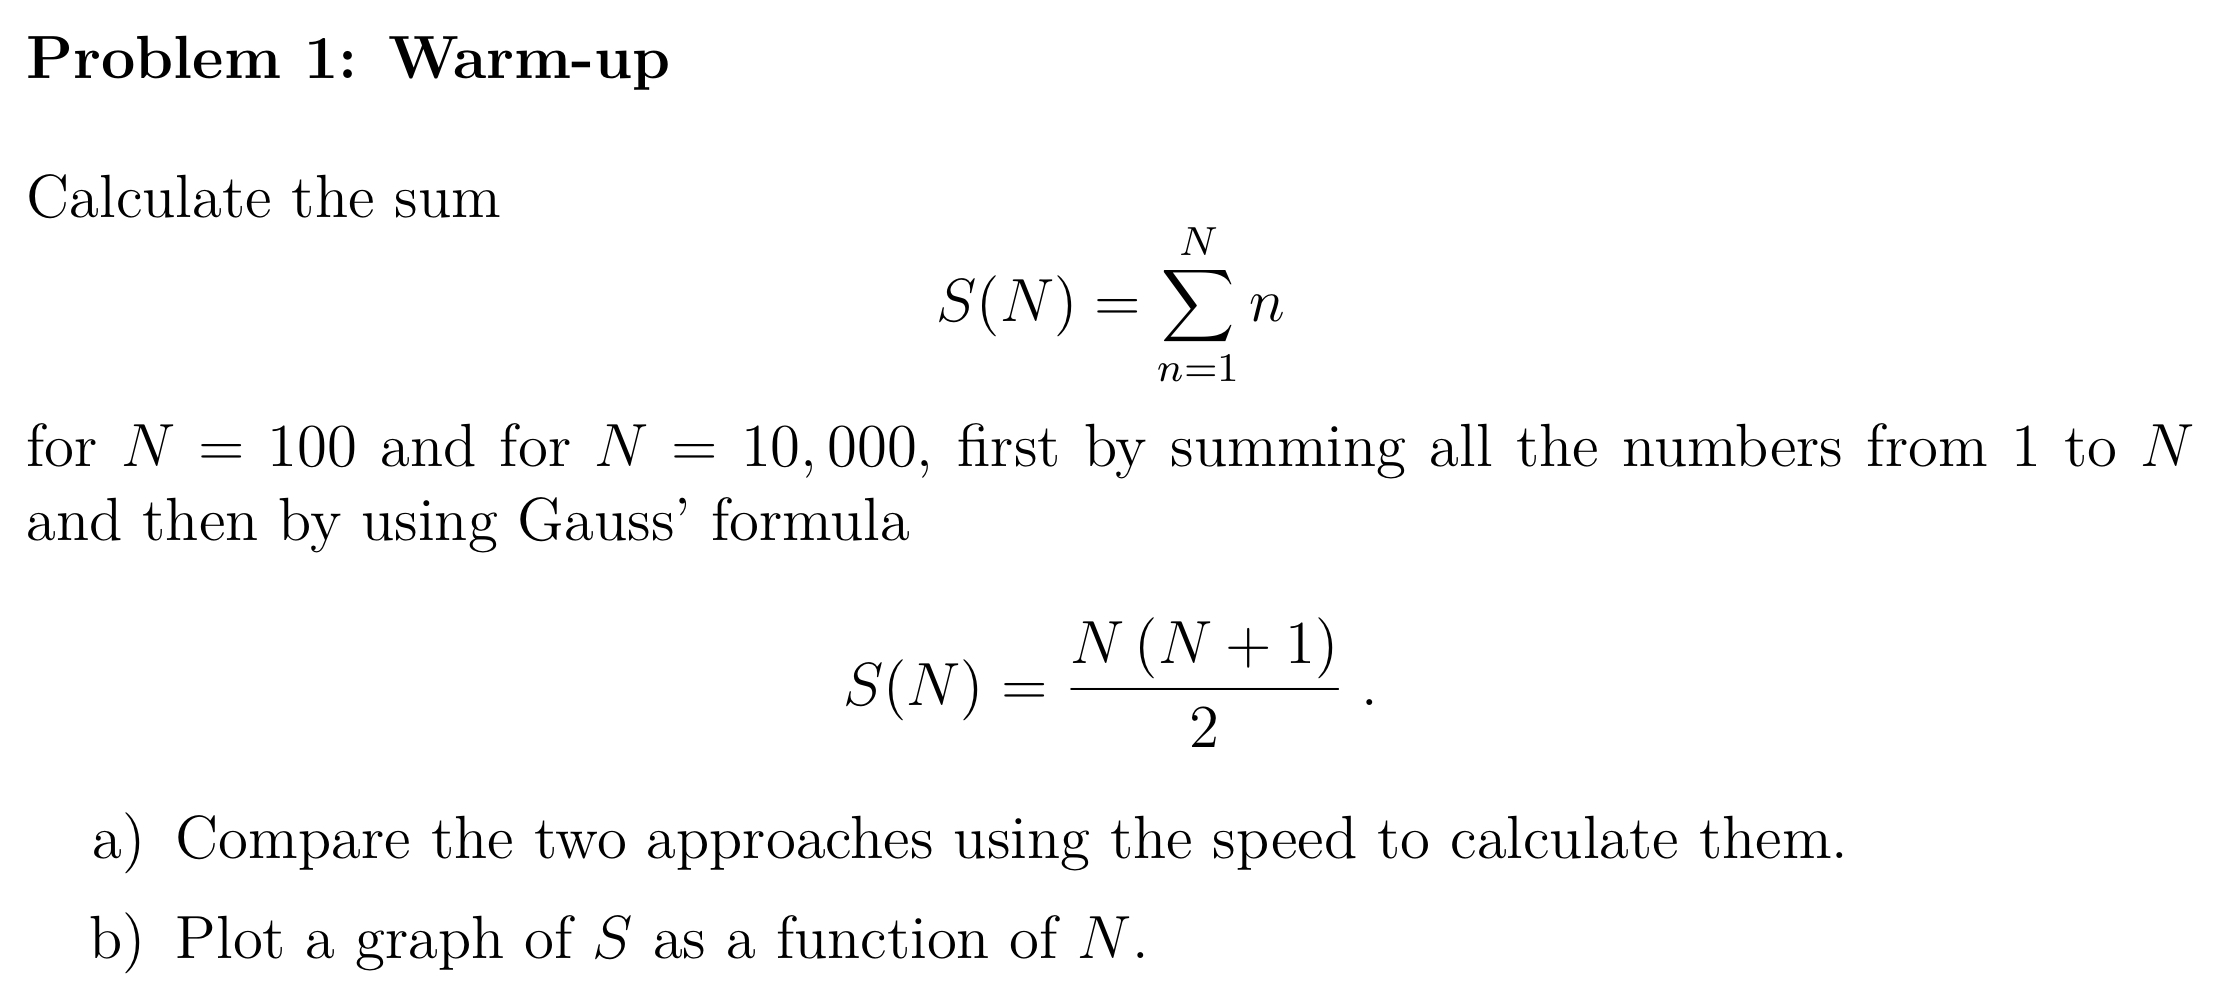

In [35]:
# We load the time library
import time
# We load the tqdm library because we want to work with progressbars
from tqdm import tqdm
# We load the numpy library
import numpy as np
# We load the library for cool mathplots
import matplotlib.pyplot as plt

In [36]:
# plot style --> we want to mimic R
plt.style.use('ggplot')

Gauss sum: 100%|██████████████████████████| 100/100 [00:00<00:00, 805048.75it/s]


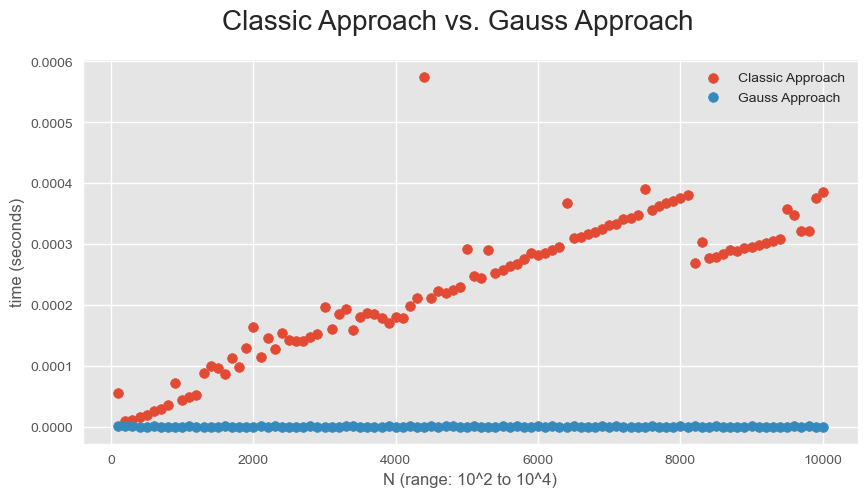

In [66]:
# We define a function to sum up in a very classic way
def classic_sum(n) -> int:
    tot = 0
    for i in range(int(n+1)):
        tot += i
    return tot

# And we define a function to sum up in a fancy way
def gauss_sum(n) -> float:
    return n*(n+1)/2

# We also need a function to measure time
def time_measure(func, n) -> float:
    start = time.time()
    func(n)
    end = time.time()
    return end - start

# now compare speed of the two functions
linspace = np.linspace(1e2, 1e4, num=100, dtype=float)

classic_sum_time = [time_measure(classic_sum, n) for n in tqdm(linspace, desc='Classic sum')]
gauss_sum_time = [time_measure(gauss_sum, n) for n in tqdm(linspace, desc='Gauss sum')]

fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('Classic Approach vs. Gauss Approach', fontsize = 20)
ax.scatter(linspace, classic_sum_time, label='Classic Approach')
ax.scatter(linspace, gauss_sum_time, label='Gauss Approach')
ax.set_xlabel('N (range: 10^2 to 10^4)'); ax.set_ylabel('time (seconds)')
ax.legend(); plt.show()

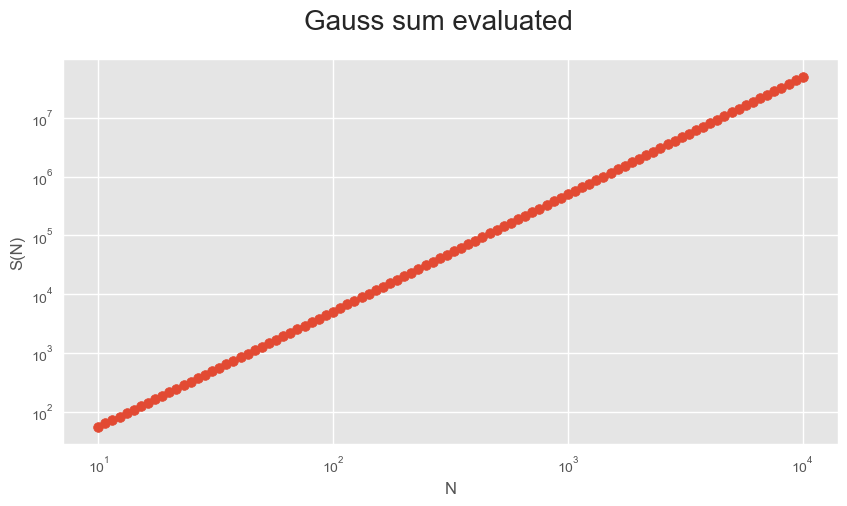

In [67]:
#now we need to plot S(N)

linspace = np.logspace(1, 4, num=100, base=10, dtype=float)
gaussian_sum = [gauss_sum(n) for n in linspace]

fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('Gauss sum evaluated', fontsize=20)
ax.scatter(linspace, gaussian_sum)
ax.set_xlabel('N'); ax.set_ylabel('S(N)'); ax.set_xscale('log'); ax.set_yscale('log'); plt.show()


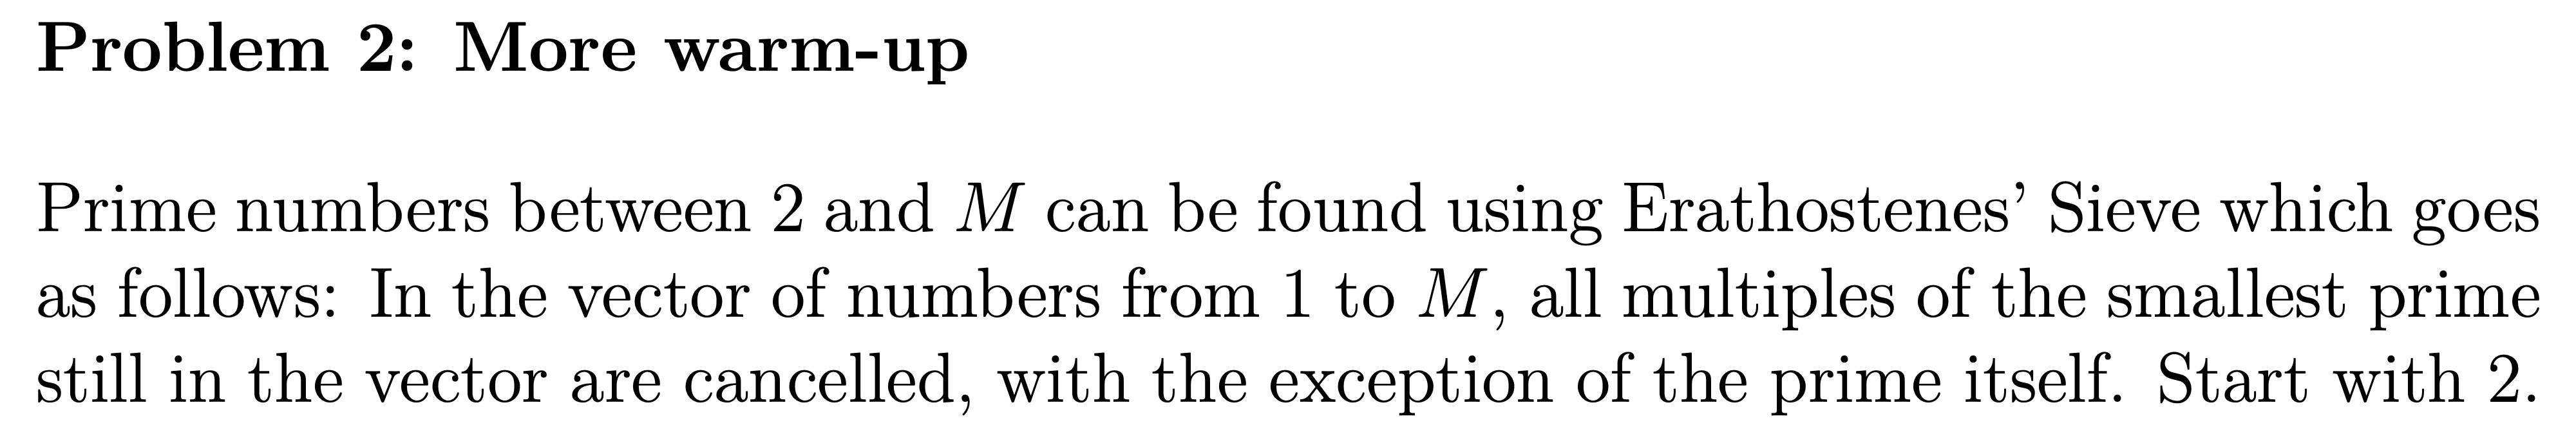

In [59]:
# We define a function

def eratosthenes_sieve(N):

    prime = [True for integer in range(N+1)]
    p = 2
    # we multiply p with 2 and this should be smaller than our upper boundary N
    while p**2 <= N:
        # If prime[p] is not changed, then it is a prime
        if prime[p]:
            # Update all multiples of p
            for i in range(p**2, N+1, p):
                prime[i] = False
        p += 1
    # Return all prime numbers
    return [p for p in range(2, N+1) if prime[p]]

N = 1000
primes = eratosthenes_sieve(N)
print("Prime numbers up to", N, ":", primes)


Prime numbers up to 1000 : [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997]


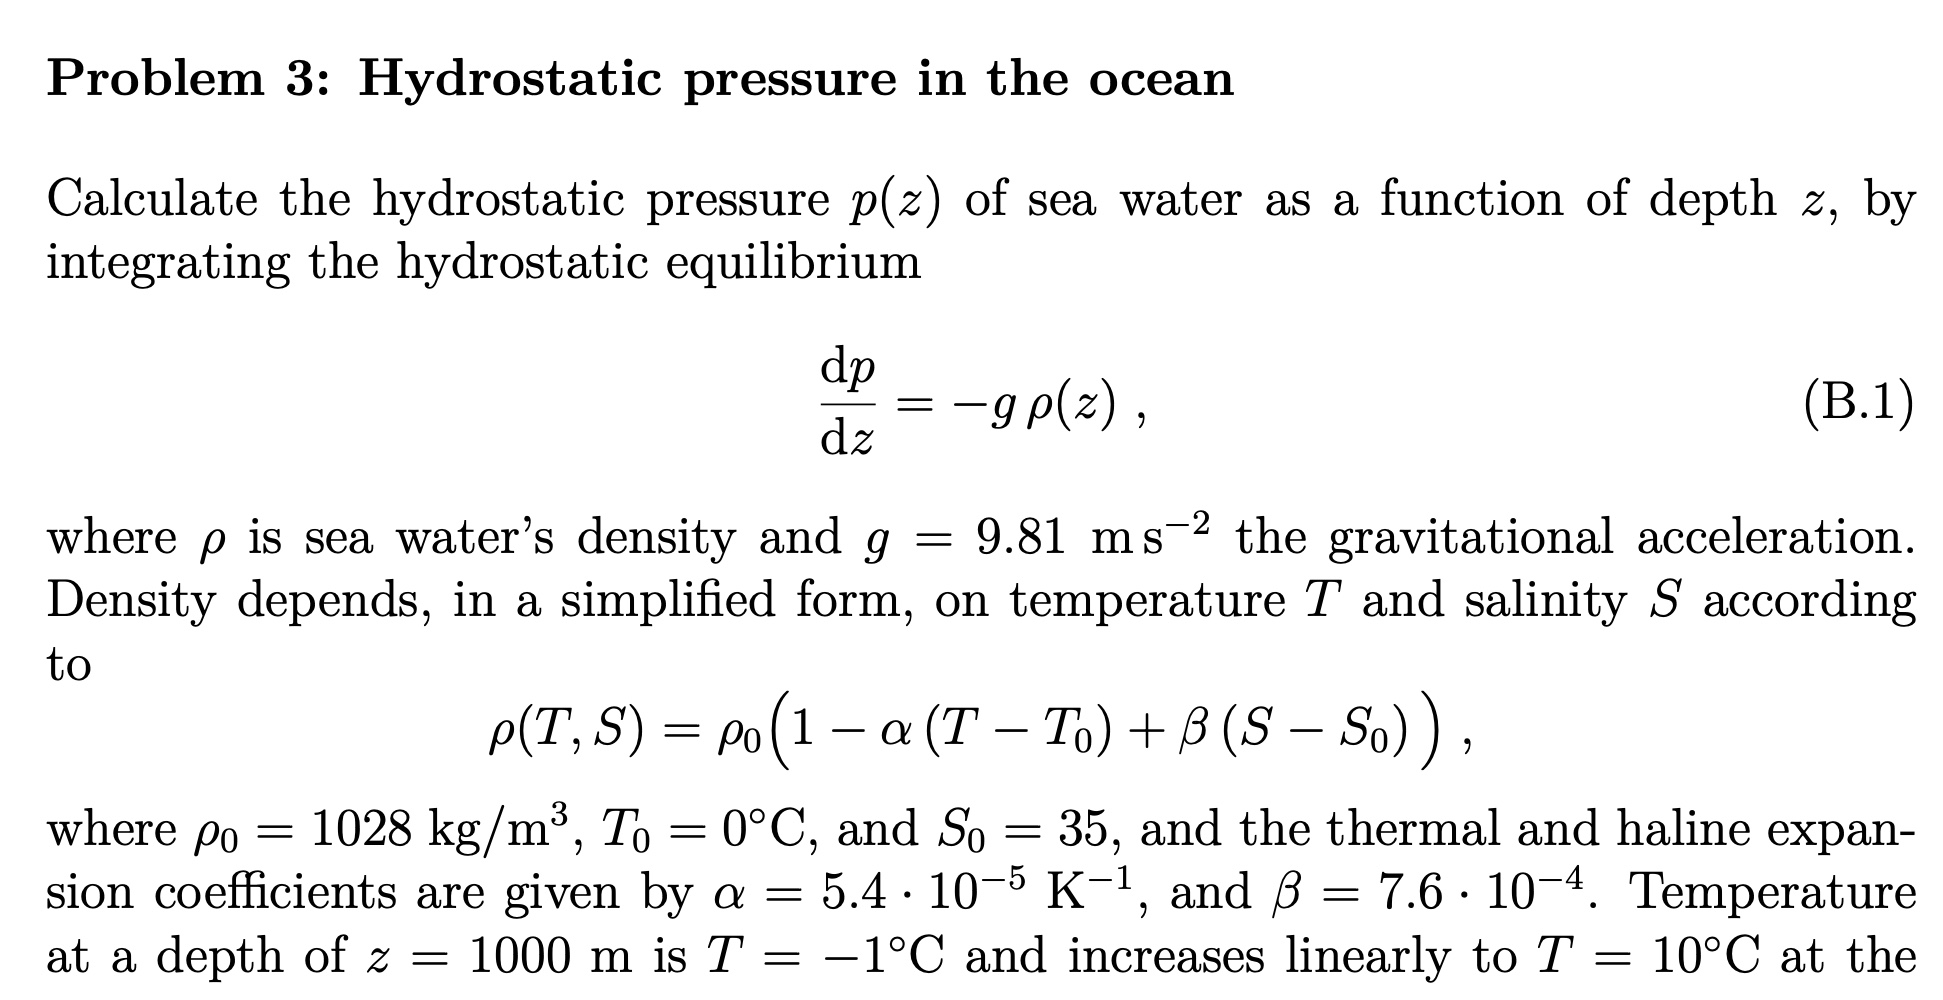


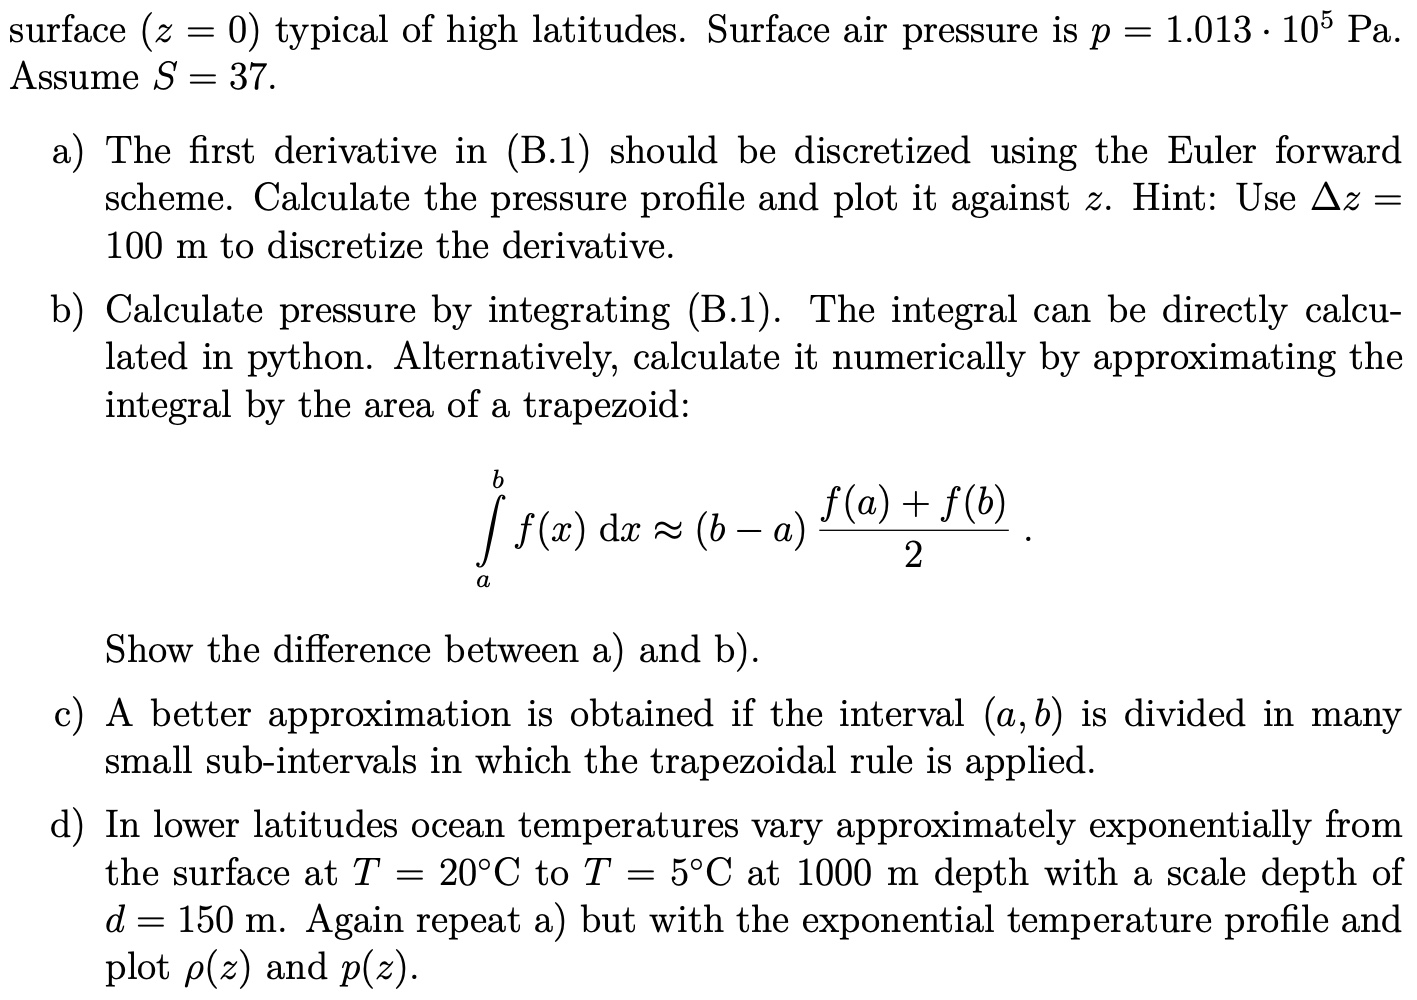

In [ ]:
# Define all variables we need
G = 9.81 # m/s^s --> gravitational acceleration
RHO_0 = 1028 # kg/m^3 --> density of the sea water (standard condition)
ALPHA = 5.4e-5 # 1/K --> haline expansion coefficient
T_0 = 273.15 # K --> temperature (standard condition)
T_SURFACE = 283.15 # K -->
T_DEPTH = 272.15 # K --> water temperature in 1000m depth
BETA = 7.6e-4 # 1/(W/m^2)
S_0 = 35 # W/m^2 --> is the salinity 
S = 37 # W/m^2 --> is the salinity
P_0 = 1.013e5 # Pa --> is the standard sea level pressure

def get_linear_temperature(z):
    return T_SURFACE - z * (T_SURFACE-T_DEPTH)/1000

def get_rho(z, temp_func):
    return RHO_0 * (1 - ALPHA * (temp_func(z) - T_0) + BETA * (S - S_0))

def get_pressure(z, delta_z, p_prev, temp_func):
    return p_prev + delta_z * G * get_rho(z, temp_func)